## Environment Setup

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
%cd rapidsai-csp-utils
!git checkout 22.12-patch
%cd ..
!python rapidsai-csp-utils/colab/env-check.py
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 5.10 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/rapidsai-csp-utils
Branch '22.12-patch' set up to track remote branch '22.12-patch' from 'origin'.
Switched to a new branch '22.12-patch'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.9 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 26, in <module>
    gpu_name = pynvml.nvmlDeviceGetName(pynvml.nvmlDeviceGetHandleByIndex(0)).decode('UTF-8')
AttributeError: 'str' object has no attribute 'decode'. Did you mean: 'encode'?
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 26, in <module>
    gpu_name =

In [59]:
%%bash
# Install the Merlin Framework
pip install -Uq git+https://github.com/NVIDIA-Merlin/models.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/nvtabular.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/core.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/system.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/dataloader.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/Transformers4Rec.git@release-23.04
# pip install -Uq xgboost lightfm implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.5/985.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.8 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
merlin-dataloader 23.6.0 requires merlin-core<23.07,>=23.06, but you have merlin-core 23.4.0+4.gc5c9bc2 which is incompatible.


## Download and Prepare Movielens 100K Dataset
Reference
- https://github.com/NVIDIA-Merlin/Merlin/blob/main/examples/getting-started-movielens/01-Download-Convert.ipynb


In [ ]:
import os

from merlin.core.utils import download_file

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()
import numpy as np

In [ ]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

In [ ]:
data_path = os.path.join(DATA_DIR, "ml-100k")
if not os.path.isdir(data_path):
    download_file(
        "http://files.grouplens.org/datasets/movielens/ml-100k.zip",
        os.path.join(DATA_DIR, "ml-100k.zip"),
    )

In [ ]:
data_path = DATA_DIR + 'ml-100k/'

# Load user ratings data
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_data = pd.read_csv(data_path + 'u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# Load movie information data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action',
               'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
               'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']
movies_data = pd.read_csv(data_path + 'u.item', sep='|', names=movies_cols, encoding='latin-1')

# Load user information data
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_data = pd.read_csv(data_path + 'u.user', sep='|', names=users_cols, encoding='latin-1')

# Step 3: Merge DataFrames
# Merge user ratings with movie information
merged_data = pd.merge(ratings_data, movies_data, on='movie_id')

# Merge the above DataFrame with user information
merged_data = pd.merge(merged_data, users_data, on='user_id')

# Combine the individual genre columns into a single categorical column
genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
              'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']

# Create a new column 'genres' by concatenating the genre names if the value is 1
merged_data['genres'] = merged_data[genre_cols].apply(lambda row: '|'.join([col for col in genre_cols if row[col] == 1]), axis=1)

# Drop the individual genre columns + `unknown` + `video_release_date` + `imdb_url`
merged_data.drop(columns=genre_cols + ['unknown', 'video_release_date', 'imdb_url'], inplace=True)

# convert genres to a list
merged_data["genres"] = merged_data["genres"].str.split("|")

# Step 4: Save as parquet
merged_data.to_parquet(f'{DATA_DIR}/movielens_100k.parquet', index=False)

print("Conversion to parquet completed successfully.")

Conversion to parquet completed successfully.


In [ ]:
merged_data

,user_id,movie_id,rating,timestamp,title,release_date,age,gender,occupation,zip_code,genres
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,49,M,writer,55105,[comedy]
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,49,M,writer,55105,"[action, adventure, comedy, sci_fi]"
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,49,M,writer,55105,"[comedy, romance]"
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,49,M,writer,55105,[comedy]
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,49,M,writer,55105,"[comedy, drama]"
...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,Titanic (1997),01-Jan-1997,48,F,administrator,33763,"[action, drama, romance]"
99996,873,326,4,891392656,G.I. Jane (1997),01-Jan-1997,48,F,administrator,33763,"[action, drama, war]"
99997,873,348,3,891392577,Desperate Measures (1998),30-Jan-1998,48,F,administrator,33763,"[crime, drama, thriller]"
99998,873,358,2,891392698,Spawn (1997),01-Aug-1997,48,F,administrator,33763,"[action, adventure, sci_fi, thriller]"


## ETL
Reference
- https://github.com/NVIDIA-Merlin/Merlin/blob/main/examples/getting-started-movielens/02-ETL-with-NVTabular.ipynb

In [1]:
import os
import shutil
import numpy as np
from nvtabular import ops
from merlin.schema.tags import Tags

import nvtabular as nvt

from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()

/usr/local/lib/python3.10/dist-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


In [2]:
DATA_VERSION = 'v4'
TRANSFORM_FULL_DATASET = True

In [3]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

In [4]:
movies = pd.read_parquet(os.path.join(DATA_DIR, "movielens_100k.parquet"))
movies.head()

,user_id,movie_id,rating,timestamp,title,release_date,age,gender,occupation,zip_code,genres
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,49,M,writer,55105,[comedy]
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,49,M,writer,55105,"[action, adventure, comedy, sci_fi]"
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,49,M,writer,55105,"[comedy, romance]"
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,49,M,writer,55105,[comedy]
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,49,M,writer,55105,"[comedy, drama]"


### Clean title and movie_id relattionship

In [5]:
movies['movie_id'].nunique(), movies['title'].nunique()

(1682, 1664)

In [6]:
title_movie_id_index = movies[['movie_id', 'title']].groupby(['movie_id', 'title'], as_index=False).count()
title_movie_id_index.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
faulty_movie_id_title =  title_movie_id_index[title_movie_id_index.duplicated('title')]
faulty_movie_id_title_map =  {key: value for key, value in zip(faulty_movie_id_title['title'], faulty_movie_id_title['movie_id'])}
faulty_movie_id_title_map

{'Chasing Amy (1997)': 268,
 "Ulee's Gold (1997)": 303,
 'Desperate Measures (1998)': 348,
 'Fly Away Home (1996)': 500,
 'Body Snatchers (1993)': 670,
 'Kull the Conqueror (1997)': 680,
 'Ice Storm, The (1997)': 865,
 'Money Talks (1997)': 881,
 'That Darn Cat! (1997)': 1003,
 'Designated Mourner, The (1997)': 1257,
 'Deceiver (1997)': 1606,
 'Hurricane Streets (1998)': 1607,
 'Hugo Pool (1997)': 1617,
 'Nightwatch (1997)': 1625,
 'Butcher Boy, The (1998)': 1650,
 'Chairman of the Board (1998)': 1654,
 'Substance of Fire, The (1996)': 1658,
 'Sliding Doors (1998)': 1680}

In [8]:
for title, movie_id in faulty_movie_id_title_map.items():
    movies.loc[movies['title'] == title, 'movie_id'] = movie_id

In [9]:
#sanity check
assert movies['movie_id'].nunique() == movies['title'].nunique()
movies.head()

,user_id,movie_id,rating,timestamp,title,release_date,age,gender,occupation,zip_code,genres
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,49,M,writer,55105,[comedy]
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,49,M,writer,55105,"[action, adventure, comedy, sci_fi]"
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,49,M,writer,55105,"[comedy, romance]"
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,49,M,writer,55105,[comedy]
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,49,M,writer,55105,"[comedy, drama]"


### Sanity Check Dataset

In [10]:
# drop user multiple reviews for same movie, keep latest
print('Duplicated ratings for the same movie from a single user:',
      len(movies[movies[['movie_id', 'user_id']].duplicated()]))

movies.drop_duplicates(['movie_id', 'user_id'], keep='last', inplace=True)
assert len(movies[movies[['movie_id', 'user_id']].duplicated()]) == 0


Duplicated ratings for the same movie from a single user: 307


In [11]:
assert (movies.groupby('user_id')['occupation'].nunique() > 1).any() == False
assert (movies.groupby('user_id')['gender'].nunique() > 1).any() == False
assert (movies.groupby('user_id')['occupation'].nunique() > 1).any() == False

### Create Genre and movie_id mapping

In [12]:
genres = movies[['movie_id','genres']]
def merge_list(srs):
    return list(set(item for sublist in srs for item in sublist))
genres = genres.groupby('movie_id')['genres'].agg(merge_list).reset_index()
genres

,movie_id,genres
0,1,"[comedy, animation, children]"
1,2,"[thriller, adventure, action]"
2,3,[thriller]
3,4,"[comedy, drama, action]"
4,5,"[crime, thriller, drama]"
...,...,...
1659,1678,[drama]
1660,1679,"[thriller, romance]"
1661,1680,"[drama, romance]"
1662,1681,[comedy]


### Explore Ratings

In [13]:
# ratings distribution
movies['rating'].value_counts(normalize=True)

4    0.341629
3    0.271534
5    0.212061
2    0.113729
1    0.061047
Name: rating, dtype: float64

In [14]:
# ratings user average
movies[['user_id', 'rating']].groupby('user_id', as_index=False).mean().describe()

,user_id,rating
count,943.000000,943.000000
mean,472.000000,3.588215
std,272.364951,0.444785
min,1.000000,1.494226
25%,236.500000,3.323054
50%,472.000000,3.620690
75%,707.500000,3.866939
max,943.000000,4.869565


In [15]:
# ratings user average
movies[['movie_id', 'rating']].groupby('movie_id', as_index=False).mean().describe()

,movie_id,rating
count,1664.000000,1664.000000
mean,841.765625,3.077075
std,485.640867,0.780217
min,1.000000,1.000000
25%,423.750000,2.665094
50%,841.500000,3.162132
75%,1262.250000,3.652592
max,1682.000000,5.000000


In [16]:
movies[movies['rating'] < 3].shape[0]/movies.shape[0]

0.17477656405163852

In [17]:
rating_dist = movies[['movie_id', 'rating']].groupby('movie_id',
                                                     as_index=False).sum().sort_values('rating', ascending=False)
rating_dist

,movie_id,rating
49,50,2541
99,100,2111
180,181,2032
256,258,1936
173,174,1786
...,...,...
1541,1559,1
1543,1561,1
1544,1562,1
1545,1563,1


### Explore New User and Movie distribution

In [18]:
def item_distribution(data, id, partitions=10_000):
    partitions = 10000
    total_records = len(data)

    unique_items_per_partitions = []
    seen_items = set()

    for i in range(0, total_records, partitions):
        chunk = data.iloc[i:i + partitions]
        unique_items = chunk[id].unique()
        new_items = {item for item in unique_items if item not in seen_items}
        seen_items = seen_items.union(set(unique_items))
        unique_items_per_partitions.append((unique_items, new_items))

    # Print the unique items per partitions
    for idx, users in enumerate(unique_items_per_partitions):
        print(f"Partition {idx+1}: {len(users[0])} unique {id} {len(users[1])/len(users[0])} new {id}")


In [19]:
sorted_movie_ratings = movies.sort_values(by="timestamp")

In [20]:
item_distribution(sorted_movie_ratings, 'user_id')

Partition 1: 113 unique user_id 1.0 new user_id
Partition 2: 152 unique user_id 0.6776315789473685 new user_id
Partition 3: 149 unique user_id 0.8053691275167785 new user_id
Partition 4: 133 unique user_id 0.631578947368421 new user_id
Partition 5: 146 unique user_id 0.4931506849315068 new user_id
Partition 6: 182 unique user_id 0.5494505494505495 new user_id
Partition 7: 177 unique user_id 0.4745762711864407 new user_id
Partition 8: 163 unique user_id 0.4662576687116564 new user_id
Partition 9: 193 unique user_id 0.5958549222797928 new user_id
Partition 10: 166 unique user_id 0.4578313253012048 new user_id


In [21]:
item_distribution(sorted_movie_ratings, 'movie_id')

Partition 1: 1116 unique movie_id 1.0 new movie_id
Partition 2: 1203 unique movie_id 0.171238570241064 new movie_id
Partition 3: 1115 unique movie_id 0.05022421524663677 new movie_id
Partition 4: 1116 unique movie_id 0.025089605734767026 new movie_id
Partition 5: 1201 unique movie_id 0.042464612822647796 new movie_id
Partition 6: 1186 unique movie_id 0.03541315345699832 new movie_id
Partition 7: 1325 unique movie_id 0.04679245283018868 new movie_id
Partition 8: 1300 unique movie_id 0.036153846153846154 new movie_id
Partition 9: 1187 unique movie_id 0.013479359730412805 new movie_id
Partition 10: 1321 unique movie_id 0.03028009084027252 new movie_id


In [22]:
# Create a dictionary to store user's interactions
from collections import defaultdict
user_interactions = defaultdict(list)


# Iterate through each row in the sorted data
for index, row in sorted_movie_ratings.iterrows():
    user_id = row['user_id']
    user_interactions[user_id].append(index)


In [23]:
print('Avaerage # of interactions per user:', sum([len(v) for v in user_interactions.values()])/len(user_interactions))
print('Min # of interactions per user:', min([len(v) for v in user_interactions.values()]))

Avaerage # of interactions per user: 105.71898197242842
Min # of interactions per user: 19


- sorted dataset shows that each 10K records roughly `50%` of the data points correspond to new users.
- a simple train, validation, test split based on timestamp would result in cold start problems during training, we want to avoid this.
- Each user has minimum of 19 interactions, we can split in ratio `0.7:0.15:0.15`

### Prepare baseline Dataset

In [24]:
val_ratio, test_ratio = 0.15, 0.15

# Split users into training, validation, and test sets
training_indices = []
validation_indices = []
test_indices = []

for user_id, interactions in user_interactions.items():
    count_interactions = len(interactions)
    val_begin = -int((val_ratio + test_ratio)*count_interactions)
    test_begin = -int(test_ratio*count_interactions)

    training_indices.extend(interactions[:val_begin])
    validation_indices.extend(interactions[val_begin:test_begin])
    test_indices.extend(interactions[test_begin:])

In [25]:
#sanity check
len(training_indices), len(validation_indices), len(test_indices)

(70202, 14954, 14537)

In [26]:
# selective columns
cols = ['user_id', 'movie_id', 'rating', 'gender', 'occupation',] #title]

sorted_movie_ratings = sorted_movie_ratings[cols]

train = sorted_movie_ratings[sorted_movie_ratings['user_id'].index.isin(training_indices)]
val = sorted_movie_ratings[sorted_movie_ratings['user_id'].index.isin(validation_indices)]
test = sorted_movie_ratings[sorted_movie_ratings['user_id'].index.isin(test_indices)]

In [27]:
#sanity check
assert (train.shape[0], val.shape[0], test.shape[0]) == (len(training_indices), len(validation_indices), len(test_indices))
_index = set(train[train['user_id'] == 1].index)
assert _index == set(user_interactions[1][:len(_index)])

In [28]:
train = pd.merge(train, genres, on='movie_id')
val = pd.merge(val, genres, on='movie_id')
test = pd.merge(test, genres, on='movie_id')

In [29]:
assert (train.shape[0], val.shape[0], test.shape[0]) == (len(training_indices), len(validation_indices), len(test_indices))

In [30]:
train.to_parquet(os.path.join(DATA_DIR, f"train_{DATA_VERSION}.parquet"))
val.to_parquet(os.path.join(DATA_DIR, f"valid_{DATA_VERSION}.parquet"))
test.to_parquet(os.path.join(DATA_DIR, f"test_{DATA_VERSION}.parquet"))

In [31]:
USER_FEATURE_COLUMNS = ["gender", "occupation"]
ITEM_FEATURE_GENRES = ['genres']
LABEL_COLUMNS = ["rating"]
USER_ID = ['user_id']
ITEM_ID = ['movie_id']

CATEGORICAL_COLUMNS = USER_FEATURE_COLUMNS + USER_ID + ITEM_ID

In [32]:
feats_itemId = ITEM_ID >> ops.Categorify() >> ops.TagAsItemID()
# used for merging augmented data
fearts_itemId_raw = ITEM_ID >> ops.Rename(postfix='_raw') >> ops.LambdaOp(lambda col: col.astype("int32"))

feats_userId = USER_ID >> ops.Categorify() >> ops.TagAsUserID()

feats_user = USER_FEATURE_COLUMNS >> ops.Categorify() >> ops.TagAsUserFeatures()
feats_item_genres = ITEM_FEATURE_GENRES >> ops.Categorify() >> ops.TagAsItemFeatures()

feats_target = (
    LABEL_COLUMNS
    >> ops.LambdaOp(lambda col: (col > 3).astype("int32"))
    >> ops.AddTags(["binary_classification", "target"])
)
output = feats_itemId + fearts_itemId_raw + feats_userId + feats_user + feats_item_genres + feats_target

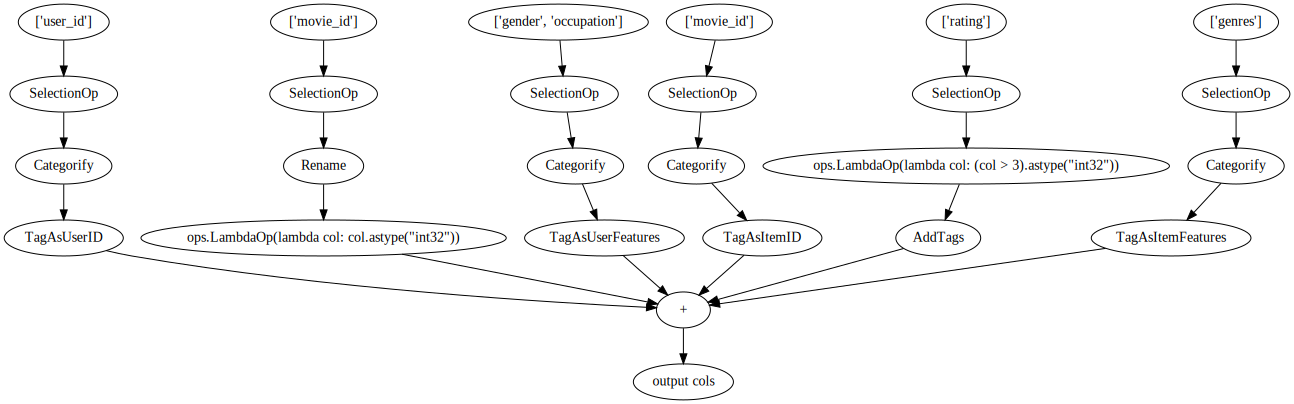

In [33]:
output.graph

In [34]:
workflow = nvt.Workflow(output)

In [35]:
dict_dtypes = {}

for col in CATEGORICAL_COLUMNS:
    dict_dtypes[col] = np.int64

for col in LABEL_COLUMNS:
    dict_dtypes[col] = np.int64

In [36]:
train_dataset = nvt.Dataset([os.path.join(DATA_DIR, f"train_{DATA_VERSION}.parquet")])
val_dataset = nvt.Dataset([os.path.join(DATA_DIR, f"valid_{DATA_VERSION}.parquet")])
test_dataset = nvt.Dataset([os.path.join(DATA_DIR, f"test_{DATA_VERSION}.parquet")])

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [37]:
# sanity check, loaded correct version data
assert (train_dataset.num_rows, val_dataset.num_rows, test_dataset.num_rows) == (len(training_indices), len(validation_indices), len(test_indices))

In [38]:
assert movies.shape[0] == sum((train_dataset.num_rows, val_dataset.num_rows, test_dataset.num_rows))

In [39]:
%%time
if TRANSFORM_FULL_DATASET:
    import merlin.io
    movies_mdf = merlin.io.Dataset(movies)
    workflow.fit(movies_mdf)
else:
    workflow.fit(train_dataset)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.1

CPU times: user 2.4 s, sys: 99.1 ms, total: 2.5 s
Wall time: 3.97 s


/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed i

In [40]:
dict_dtypes

{'gender': numpy.int64,
 'occupation': numpy.int64,
 'user_id': numpy.int64,
 'movie_id': numpy.int64,
 'rating': numpy.int64}

In [41]:
assert DATA_VERSION

In [42]:
%%time
train_dataset_trans =  workflow.transform(train_dataset)
train_dataset_trans.to_parquet(
    output_path=os.path.join(DATA_DIR, f'train_{DATA_VERSION}'),
    shuffle=nvt.io.Shuffle.PER_PARTITION,
    cats=CATEGORICAL_COLUMNS,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 950 ms, sys: 13 ms, total: 963 ms
Wall time: 1.04 s


In [43]:
%%time
val_dataset_trans =  workflow.transform(val_dataset)
val_dataset_trans.to_parquet(
    output_path=os.path.join(DATA_DIR, f'valid_{DATA_VERSION}'),
    shuffle=False,
    cats=CATEGORICAL_COLUMNS,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 276 ms, sys: 8.97 ms, total: 285 ms
Wall time: 325 ms


In [44]:
%%time
workflow.transform(test_dataset).to_parquet(
    output_path=os.path.join(DATA_DIR, f'test_{DATA_VERSION}'),
    shuffle=False,
    cats=CATEGORICAL_COLUMNS,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 268 ms, sys: 7.81 ms, total: 276 ms
Wall time: 323 ms


In [45]:
workflow.save(os.path.join(DATA_DIR, f'workflow_{DATA_VERSION}'))
workflow.output_schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.freq_threshold,properties.max_size,properties.start_index,properties.cat_path,properties.domain.min,properties.domain.max,properties.domain.name,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ID, Tags.ITEM, Tags.CATEGORICAL, Tags.IT...","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.movie_id.parquet,0.0,1664.0,movie_id,1665.0,102.0,NaN,NaN
1,movie_id_raw,(),"DType(name='int32', element_type=<ElementType....",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user_id,"(Tags.ID, Tags.CATEGORICAL, Tags.USER_ID, Tags...","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.user_id.parquet,0.0,943.0,user_id,944.0,74.0,NaN,NaN
3,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.gender.parquet,0.0,2.0,gender,3.0,16.0,NaN,NaN
4,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.occupation.parquet,0.0,21.0,occupation,22.0,16.0,NaN,NaN
5,genres,"(Tags.ITEM, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",True,True,NaN,0.0,0.0,0.0,.//categories/unique.genres.parquet,0.0,19.0,genres,20.0,16.0,0.0,NaN
6,rating,"(Tags.BINARY_CLASSIFICATION, Tags.TARGET)","DType(name='int32', element_type=<ElementType....",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# check that movie_id_raw is intact
assert (train_dataset_trans.to_ddf().compute()['movie_id_raw'] == train_dataset.to_ddf().compute()['movie_id']).all()

In [47]:
# sanity check
train_dataset_trans.to_ddf().head()

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating
0,156,255,592,1,1,"[2, 5]",1
1,156,255,181,1,5,"[2, 5]",0
2,156,255,33,1,18,"[2, 5]",1
3,156,255,147,2,2,"[2, 5]",1
4,156,255,620,1,1,"[2, 5]",1


#### Sanity Check

In [48]:
import glob

TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, f'train_{DATA_VERSION}', "*.parquet")))
VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, f'valid_{DATA_VERSION}', "*.parquet")))
TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, f'test_{DATA_VERSION}', "*.parquet")))
TRAIN_PATHS, VALID_PATHS, TEST_PATHS

(['/content/drive/MyDrive/ml-twotower-model/data/train_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/valid_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/test_v4/part_0.parquet'])

In [49]:
df = pd.read_parquet(TRAIN_PATHS[0])
df

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating
0,226,705,149,1,3,"[5, 13]",1
1,74,144,148,1,3,"[4, 3]",1
2,137,203,295,1,5,[15],1
3,9,300,761,1,3,"[4, 3]",1
4,43,25,212,2,7,[2],1
...,...,...,...,...,...,...,...
70197,466,633,133,1,4,[1],1
70198,353,529,158,2,3,[1],0
70199,8,1,476,1,16,"[2, 14, 10]",1
70200,276,170,193,1,5,"[2, 1, 5]",1


In [50]:
df['rating'].value_counts()

1    40914
0    29288
Name: rating, dtype: int64

In [51]:
df = pd.read_parquet(VALID_PATHS[0])
df

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating
0,271,520,817,1,3,"[8, 6]",1
1,271,520,694,1,14,"[8, 6]",1
2,271,520,547,1,2,"[8, 6]",0
3,271,520,96,1,5,"[8, 6]",1
4,271,520,541,1,7,"[8, 6]",1
...,...,...,...,...,...,...,...
14949,983,1286,7,2,1,"[2, 5, 13]",1
14950,1427,1516,7,2,1,[1],1
14951,1040,1099,166,1,12,[1],1
14952,1395,911,425,1,8,"[9, 1]",0


In [52]:
df['rating'].value_counts()

0    7578
1    7376
Name: rating, dtype: int64

In [53]:
df = pd.read_parquet(TEST_PATHS[0])
df

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating
0,311,679,226,2,12,"[6, 3]",0
1,311,679,170,1,1,"[6, 3]",0
2,311,679,38,1,4,"[6, 3]",1
3,311,679,106,2,2,"[6, 3]",0
4,311,679,169,1,4,"[6, 3]",1
...,...,...,...,...,...,...,...
14532,1403,992,26,1,1,"[2, 4]",1
14533,1616,1525,37,1,8,"[2, 5]",1
14534,1130,1615,143,2,11,"[17, 6, 3, 10]",1
14535,1318,1138,143,2,11,"[2, 9, 1, 3]",1


In [54]:
df['rating'].value_counts()

0    7628
1    6909
Name: rating, dtype: int64

### Augment Data

In [55]:
! pip install transformers

In [56]:
# load dataset with synopsis
synopsis_df = pd.read_parquet(os.path.join(DATA_DIR, 'movielens_100k_synopsis_raw.parquet'))
synopsis_df

,movie_id,title,synopsis,cast
0,242,Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"Zdeněk Svěrák, Andrej Chal"
1,257,Men in Black (1997),"In Men in Black, Will Smith plays a talented N...","Will Smith, Tommy Lee Jones, Linda Fiorentino,..."
2,111,"Truth About Cats & Dogs, The (1996)","""The Truth About Cats & Dogs"" is a romantic co...","Uma Thurman, Janeane Garofalo, Ben Chaplin"
3,25,"Birdcage, The (1996)","In ""Birdcage, The"", a gay cabaret owner and hi...","Robin Williams, Nathan Lane, Gene Hackman, Dia..."
4,382,"Adventures of Priscilla, Queen of the Desert, ...","""Adventures of Priscilla, Queen of the Desert""...","Terence Stamp, Hugo Weaving, Guy Pearce"
...,...,...,...,...
1677,1310,"Walk in the Sun, A (1945)","""A Walk in the Sun"" is a 1945 war drama film t...","Dana Andrews, Richard Conte, George Tyne, John..."
1678,1614,"Reluctant Debutante, The (1958)",The Reluctant Debutante (1958) tells the story...,"Rex Harrison, Kay Kendall, John Saxon, Sandra"
1679,1505,Killer: A Journal of Murder (1995),"""Killer: A Journal of Murder"" is a 1995 crime ...","James Woods, Robert Sean Leonard, Ellen Greene..."
1680,1533,I Don't Want to Talk About It (De eso no se ha...,"""I Don't Want to Talk About It"" (De eso no se ...","Marcello Mastroianni, Luisina Brando, Alejandr..."


In [57]:
# fix synopsis_df, correctly map title and movie_id
for title, movie_id in faulty_movie_id_title_map.items():
    synopsis_df.loc[synopsis_df['title'] == title, 'movie_id'] = movie_id
synopsis_df.drop_duplicates(inplace=True)

In [58]:
synopsis_df.shape

(1664, 4)

In [59]:
assert synopsis_df['title'].nunique() == synopsis_df['movie_id'].nunique()

In [61]:
# Transform cast into list
synopsis_df['cast'] = synopsis_df['cast'].apply(str.lower).str.split(',')
synopsis_df.head()

,movie_id,title,synopsis,cast
0,242,Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"[zdeněk svěrák, andrej chal]"
1,257,Men in Black (1997),"In Men in Black, Will Smith plays a talented N...","[will smith, tommy lee jones, linda fiorenti..."
2,111,"Truth About Cats & Dogs, The (1996)","""The Truth About Cats & Dogs"" is a romantic co...","[uma thurman, janeane garofalo, ben chaplin]"
3,25,"Birdcage, The (1996)","In ""Birdcage, The"", a gay cabaret owner and hi...","[robin williams, nathan lane, gene hackman, ..."
4,382,"Adventures of Priscilla, Queen of the Desert, ...","""Adventures of Priscilla, Queen of the Desert""...","[terence stamp, hugo weaving, guy pearce]"


#### Generate Custom Embeddings

In [60]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
# from transformers import DistilBertTokenizer, TFDistilBertModel

# from tensorflow.keras import mixed_precision
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

# use this if there is CUDA OOM
# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# bert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [62]:
from tqdm import tqdm
def get_bert_embeddings_pooled(input, tokenizer, model, batch_size):
    # Tokenize the list of strings
    tokenized_inputs = tokenizer(input, padding=True, truncation=True, return_tensors="tf")

    # Get the number of samples in the dataset
    num_samples = len(tokenized_inputs["input_ids"])

    # Create a dataset from the tokenized inputs
    dataset = tf.data.Dataset.from_tensor_slices(tokenized_inputs)

    # Batch the dataset
    batched_dataset = dataset.batch(batch_size)

    # Initialize a list to store the embeddings
    embeddings = []

    # Pass the batched inputs through the BERT model to get the embeddings
    with tf.device('/GPU:0'):  # Use GPU if available for faster inference
        for batch in tqdm(batched_dataset):
            batch_embeddings = model(**batch)[0]
            pooled = tf.reduce_mean(batch_embeddings, axis=1)
            embeddings.append(pooled)

    # Concatenate the embeddings from different batches
    embeddings = tf.concat(embeddings, axis=0)

    return embeddings

In [63]:
batch_size = 256
synopsis_embeddings = get_bert_embeddings_pooled(synopsis_df['synopsis'].tolist(), tokenizer, bert_model, batch_size)

100%|██████████| 7/7 [00:12<00:00,  1.77s/it]


In [64]:
batch_size = 256
title_embeddings = get_bert_embeddings_pooled(synopsis_df['title'].tolist(), tokenizer, bert_model, batch_size)

100%|██████████| 7/7 [00:10<00:00,  1.46s/it]


In [65]:
synopsis_embeddings.shape, title_embeddings.shape

(TensorShape([1664, 768]), TensorShape([1664, 768]))

#### Save Embeddings

In [66]:
embeddings_df = pd.DataFrame({
    'movie_id_raw': synopsis_df['movie_id'].tolist(),
    'title_embeddings': title_embeddings.numpy().tolist(),
    'synopsis_embeddings': synopsis_embeddings.numpy().tolist(),
})
embeddings_df

,movie_id_raw,title_embeddings,synopsis_embeddings
0,242,"[-0.13162817060947418, -0.10936637222766876, -...","[-0.22289082407951355, 0.27888065576553345, 0...."
1,257,"[0.0813906192779541, -0.16367456316947937, -0....","[-0.11132552474737167, -0.04103025048971176, 0..."
2,111,"[0.1584288328886032, -0.03202274814248085, -0....","[0.07356611639261246, -0.005173327401280403, 0..."
3,25,"[-0.13973236083984375, -0.19878560304641724, -...","[0.07982735335826874, -0.12655968964099884, 0...."
4,382,"[-0.1868968904018402, -0.19982214272022247, 0....","[0.06059129536151886, 0.12666839361190796, 0.2..."
...,...,...,...
1659,1310,"[-0.22653751075267792, -0.2588488459587097, -0...","[-0.08413553237915039, 0.081197589635849, 0.00..."
1660,1614,"[-0.2648628354072571, -0.3851380944252014, -0....","[-0.2362835556268692, 0.037296682596206665, 0...."
1661,1505,"[-0.07384385168552399, -0.40545621514320374, -...","[-0.18576304614543915, 0.12107942253351212, 0...."
1662,1533,"[0.1179150864481926, -0.14594942331314087, -0....","[0.026467280462384224, 0.007153572980314493, 0..."


In [67]:
# TODO, quick hack, should be transformed movie_id
embeddings_df.to_parquet(os.path.join(DATA_DIR, f'embeddings_full_index_{DATA_VERSION}.parquet'), index=False)

In [68]:
# merge with train_dataset
train_dataset_trans_df = train_dataset_trans.to_ddf().compute()
train_dataset_trans_df

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating
0,156,255,592,1,1,"[2, 5]",1
1,156,255,181,1,5,"[2, 5]",0
2,156,255,33,1,18,"[2, 5]",1
3,156,255,147,2,2,"[2, 5]",1
4,156,255,620,1,1,"[2, 5]",1
...,...,...,...,...,...,...,...
70197,1508,1304,450,1,2,"[9, 3]",1
70198,1508,1304,35,1,5,"[9, 3]",0
70199,1630,1309,450,1,2,[1],0
70200,1187,918,370,1,2,[5],0


In [69]:
movie_id_trans =  train_dataset_trans_df[['movie_id_raw', 'movie_id']].groupby(['movie_id_raw', 'movie_id'], as_index=False).count()
movie_id_trans

,movie_id_raw,movie_id
0,1,8
1,2,239
2,3,371
3,4,107
4,5,392
...,...,...
1556,1662,1475
1557,1670,1562
1558,1672,1476
1559,1676,1568


In [70]:
only_train_embeddings = pd.merge(embeddings_df, movie_id_trans, how='inner', on='movie_id_raw')
only_train_embeddings

,movie_id_raw,title_embeddings,synopsis_embeddings,movie_id
0,242,"[-0.13162817060947418, -0.10936637222766876, -...","[-0.22289082407951355, 0.27888065576553345, 0....",289
1,257,"[0.0813906192779541, -0.16367456316947937, -0....","[-0.11132552474737167, -0.04103025048971176, 0...",31
2,111,"[0.1584288328886032, -0.03202274814248085, -0....","[0.07356611639261246, -0.005173327401280403, 0...",53
3,25,"[-0.13973236083984375, -0.19878560304641724, -...","[0.07982735335826874, -0.12655968964099884, 0....",43
4,382,"[-0.1868968904018402, -0.19982214272022247, 0....","[0.06059129536151886, 0.12666839361190796, 0.2...",307
...,...,...,...,...
1556,1657,"[-0.0693514421582222, -0.3555043935775757, -0....","[-0.04539051651954651, 0.08155062049627304, 0....",1588
1557,1515,"[-0.10045406967401505, -0.201922208070755, -0....","[-0.16786226630210876, 0.07765710353851318, 0....",1614
1558,1309,"[-0.1885366439819336, -0.4115959703922272, -0....","[-0.3060604929924011, 0.2985038161277771, 0.20...",1630
1559,1505,"[-0.07384385168552399, -0.40545621514320374, -...","[-0.18576304614543915, 0.12107942253351212, 0....",1622


In [71]:
assert set(train_dataset_trans_df['movie_id']) == set(only_train_embeddings['movie_id'])

In [72]:
only_train_embeddings.drop('movie_id_raw', axis=1).to_parquet(os.path.join(DATA_DIR, f'embeddings_train_index_{DATA_VERSION}.parquet'), index=False)

#### Transform

In [73]:
SYNOPSIS_COLUMN = ['synopsis']
TITLE_COLUMN = ['title']
CAST_COLUMN = ['cast']

In [74]:
# taken from previous cell
feats_itemId = ITEM_ID >> ops.Categorify() >> ops.TagAsItemID()
# used for merging augmented data
fearts_itemId_raw = ITEM_ID >> ops.Rename(postfix='_raw') >> ops.LambdaOp(lambda col: col.astype("int32"))

feats_userId = USER_ID >> ops.Categorify() >> ops.TagAsUserID()

feats_user = USER_FEATURE_COLUMNS >> ops.Categorify() >> ops.TagAsUserFeatures()
feats_item_genres = ITEM_FEATURE_GENRES >> ops.Categorify() >> ops.TagAsItemFeatures()

feats_target = (
    LABEL_COLUMNS
    >> ops.LambdaOp(lambda col: (col > 3).astype("int32"))
    >> ops.AddTags(["binary_classification", "target"])
)
output = feats_itemId + fearts_itemId_raw + feats_userId + feats_user + feats_item_genres + feats_target

In [75]:
feats_item_synopsis = SYNOPSIS_COLUMN >> ops.Categorify() >> ops.TagAsItemFeatures()
feats_item_title = TITLE_COLUMN >> ops.Categorify() >> ops.TagAsItemFeatures()
feats_item_cast = CAST_COLUMN >> ops.Categorify() >> ops.TagAsItemFeatures()

# output is previous workflow
aug_output = output + feats_item_synopsis + feats_item_title + feats_item_cast
CATEGORICAL_COLUMNS += SYNOPSIS_COLUMN + TITLE_COLUMN + CAST_COLUMN

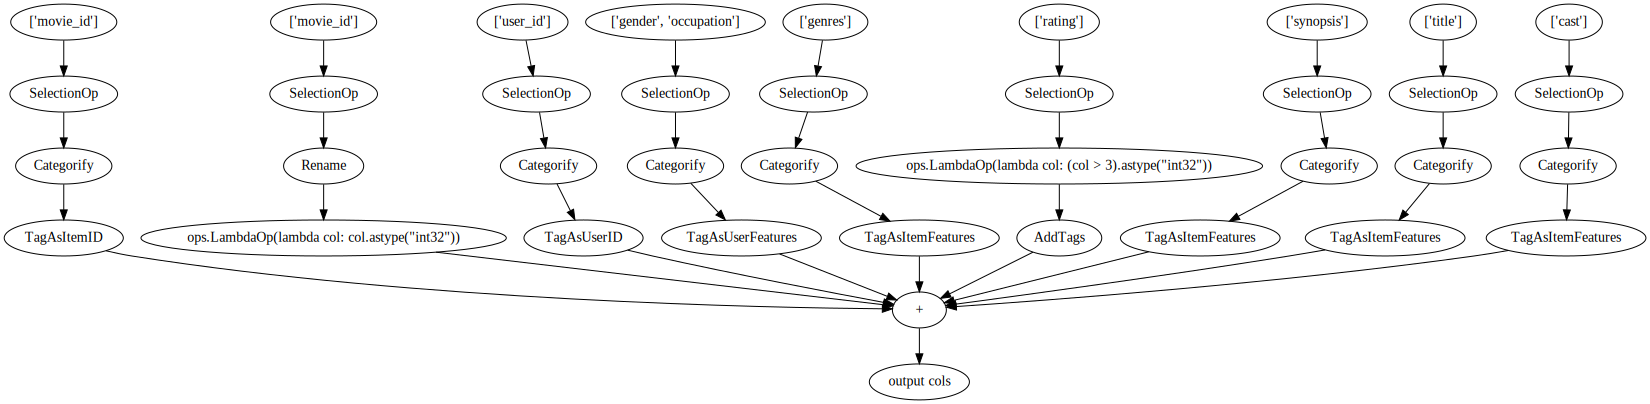

In [76]:
aug_output.graph

In [77]:
synopsis_dataset = merlin.io.dataset.Dataset(synopsis_df)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [78]:
#sanity check if this is raw dataset
train_dataset.to_ddf().compute()

,user_id,movie_id,rating,gender,occupation,genres
0,259,255,4,M,student,"[comedy, romance]"
1,119,255,3,M,programmer,"[comedy, romance]"
2,130,255,4,M,none,"[comedy, romance]"
3,342,255,4,F,other,"[comedy, romance]"
4,30,255,4,M,student,"[comedy, romance]"
...,...,...,...,...,...,...
70197,167,1304,4,M,other,"[crime, action]"
70198,551,1304,1,M,programmer,"[crime, action]"
70199,167,1309,1,M,other,[drama]
70200,587,918,3,M,other,[romance]


In [79]:
# merge with train, val and test
train_dataset_aug = merlin.io.dataset.Dataset.merge(train_dataset, synopsis_dataset, on='movie_id')
val_dataset_aug = merlin.io.dataset.Dataset.merge(val_dataset, synopsis_dataset, on='movie_id')
test_dataset_aug = merlin.io.dataset.Dataset.merge(test_dataset, synopsis_dataset, on='movie_id')

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [80]:
train_dataset_aug.head()

,user_id,movie_id,rating,gender,occupation,genres,title,synopsis,cast
0,259,255,4,M,student,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
1,119,255,3,M,programmer,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
2,130,255,4,M,none,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
3,342,255,4,F,other,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."
4,30,255,4,M,student,"[comedy, romance]",My Best Friend's Wedding (1997),"""My Best Friend's Wedding"" is a romantic comed...","[julia roberts, dermot mulroney, cameron dia..."


In [83]:
# merge with fulldataset
movies_dataset = merlin.io.dataset.Dataset(movies.drop('title', axis=1))
movies_aug = merlin.io.dataset.Dataset.merge(movies_dataset, synopsis_dataset, on='movie_id')
movies_aug.to_ddf().compute()

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


,user_id,movie_id,rating,timestamp,release_date,age,gender,occupation,zip_code,genres,title,synopsis,cast
0,196,242,3,881250949,24-Jan-1997,49,M,writer,55105,[comedy],Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"[zdeněk svěrák, andrej chal]"
1,63,242,3,875747190,24-Jan-1997,31,M,marketing,75240,[comedy],Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"[zdeněk svěrák, andrej chal]"
2,226,242,5,883888671,24-Jan-1997,28,M,student,92103,[comedy],Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"[zdeněk svěrák, andrej chal]"
3,154,242,3,879138235,24-Jan-1997,25,M,student,53703,[comedy],Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"[zdeněk svěrák, andrej chal]"
4,306,242,5,876503793,24-Jan-1997,45,M,other,73132,[comedy],Kolya (1996),Kolya (1996) is a Czech comedy-drama film dire...,"[zdeněk svěrák, andrej chal]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99688,167,1310,3,892738384,01-Jan-1945,37,M,other,L9G2B,[drama],"Walk in the Sun, A (1945)","""A Walk in the Sun"" is a 1945 war drama film t...","[dana andrews, richard conte, george tyne, ..."
99689,496,1614,3,876070690,01-Jan-1958,21,F,student,55414,"[comedy, drama]","Reluctant Debutante, The (1958)",The Reluctant Debutante (1958) tells the story...,"[rex harrison, kay kendall, john saxon, san..."
99690,291,1505,4,874868647,06-Sep-1996,19,M,student,44106,"[crime, drama]",Killer: A Journal of Murder (1995),"""Killer: A Journal of Murder"" is a 1995 crime ...","[james woods, robert sean leonard, ellen gre..."
99691,381,1533,4,892696106,01-Jan-1993,33,M,artist,94608,[drama],I Don't Want to Talk About It (De eso no se ha...,"""I Don't Want to Talk About It"" (De eso no se ...","[marcello mastroianni, luisina brando, aleja..."


In [81]:
aug_workflow = nvt.Workflow(aug_output)

In [82]:
assert DATA_VERSION

In [84]:
# fit on train dataset
if TRANSFORM_FULL_DATASET:
    aug_workflow.fit(movies_aug)
else:
    aug_workflow.fit(train_dataset_aug)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tag

In [85]:
%%time
train_dataset_aug_trans = aug_workflow.transform(train_dataset_aug)
train_dataset_aug_trans.to_parquet(
    output_path=os.path.join(DATA_DIR, f"train_aug_{DATA_VERSION}"),
    shuffle=nvt.io.Shuffle.PER_PARTITION,
    cats=train_dataset_aug_trans.schema.select_by_tag(Tags.CATEGORICAL).column_names,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 1.32 s, sys: 40.3 ms, total: 1.36 s
Wall time: 4.56 s


In [86]:
%%time
aug_workflow.transform(val_dataset_aug).to_parquet(
    output_path=os.path.join(DATA_DIR, f"valid_aug_{DATA_VERSION}"),
    shuffle=False,
    cats=train_dataset_aug_trans.schema.select_by_tag(Tags.CATEGORICAL).column_names,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 312 ms, sys: 7.34 ms, total: 319 ms
Wall time: 3.52 s


In [87]:
%%time
aug_workflow.transform(test_dataset_aug).to_parquet(
    output_path=os.path.join(DATA_DIR, f"test_aug_{DATA_VERSION}"),
    shuffle=False,
    cats=train_dataset_aug_trans.schema.select_by_tag(Tags.CATEGORICAL).column_names,
    labels=LABEL_COLUMNS,
    dtypes=dict_dtypes,
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


CPU times: user 334 ms, sys: 13.6 ms, total: 348 ms
Wall time: 3.55 s


In [89]:
aug_workflow.save(os.path.join(DATA_DIR, f'aug_workflow{DATA_VERSION}'))

aug_workflow.output_schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.freq_threshold,properties.max_size,properties.start_index,properties.cat_path,properties.domain.min,properties.domain.max,properties.domain.name,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ID, Tags.ITEM, Tags.CATEGORICAL, Tags.IT...","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.movie_id.parquet,0.0,1664.0,movie_id,1665.0,102.0,NaN,NaN
1,movie_id_raw,(),"DType(name='int32', element_type=<ElementType....",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user_id,"(Tags.ID, Tags.CATEGORICAL, Tags.USER_ID, Tags...","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.user_id.parquet,0.0,943.0,user_id,944.0,74.0,NaN,NaN
3,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.gender.parquet,0.0,2.0,gender,3.0,16.0,NaN,NaN
4,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.occupation.parquet,0.0,21.0,occupation,22.0,16.0,NaN,NaN
5,genres,"(Tags.ITEM, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",True,True,NaN,0.0,0.0,0.0,.//categories/unique.genres.parquet,0.0,19.0,genres,20.0,16.0,0.0,NaN
6,rating,"(Tags.BINARY_CLASSIFICATION, Tags.TARGET)","DType(name='int32', element_type=<ElementType....",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,synopsis,"(Tags.ITEM, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.synopsis.parquet,0.0,1664.0,synopsis,1665.0,102.0,NaN,NaN
8,title,"(Tags.ITEM, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,0.0,.//categories/unique.title.parquet,0.0,1664.0,title,1665.0,102.0,NaN,NaN
9,cast,"(Tags.ITEM, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",True,True,NaN,0.0,0.0,0.0,.//categories/unique.cast.parquet,0.0,4759.0,cast,4760.0,183.0,0.0,NaN


# TMP

<img src="https://developer.download.nvidia.com/notebooks/dlsw-notebooks/merlin_models_05-retrieval-model/nvidia_logo.png" style="width: 90px; float: right;">

# Building a Retrieval Model with Merlin Models

This notebook is created using the latest stable [merlin-tensorflow](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/merlin/containers/merlin-tensorflow/tags) container.

In large scale recommender systems pipelines, the size of the item catalog (number of unique items) might be in the order of millions. At such scale, a typical setup is having two-stage pipeline, where a faster candidate retrieval model quickly extracts thousands of relevant items and a then a more powerful ranking model (i.e. with more features and more powerful architecture) ranks the top-k items that are going to be displayed to the user. For ML-based candidate retrieval model, as it needs to quickly score millions of items for a given user, a popular choices are models that can produce recommendation scores by just computing the dot product the user embeddings and item embeddings. Popular choices of such models are **Matrix Factorization**, which learns low-rank user and item embeddings, and the **Two-Tower architecture**, which is a neural network with two MLP towers where both user and item features are fed to generate user and item embeddings in the output.


### Dataset

In this notebook, we are building a Two-Tower model for Item Retrieval task using synthetic datasets that are mimicking the real [Ali-CCP: Alibaba Click and Conversion Prediction](https://tianchi.aliyun.com/dataset/dataDetail?dataId=408#1) dataset.
### Learning objectives
- Preparing the data with NVTabular
- Training and evaluating Two-Tower model with Merlin Models
- Exporting the model for deployment
- Generating the top K recommendations from the trained model

### Feature Engineering with NVTabular

Let's generate synthetic train and validation dataset objects.

In [66]:
from merlin.datasets.synthetic import generate_data

DATA_FOLDER = os.environ.get("DATA_FOLDER", "/workspace/data/")
NUM_ROWS = os.environ.get("NUM_ROWS", 1000000)
SYNTHETIC_DATA = eval(os.environ.get("SYNTHETIC_DATA", "True"))

if SYNTHETIC_DATA:
    train, valid = generate_data("aliccp-raw", int(NUM_ROWS), set_sizes=(0.7, 0.3))
else:
    train = nvt.Dataset(DATA_FOLDER + "/train/*.parquet")
    valid = nvt.Dataset(DATA_FOLDER + "/valid/*.parquet")

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [67]:
train = train.to_ddf().compute()
valid = valid.to_ddf().compute()

In [68]:
train

,user_id,user_shops,user_profile,user_group,user_gender,user_age,user_consumption_1,user_consumption_2,user_is_occupied,user_geography,...,item_shop,item_brand,item_intention,user_item_categories,user_item_shops,user_item_brands,user_item_intentions,position,click,conversion
0,19,943,1,1,1,1,1,1,1,1,...,2336,805,372,4629,197647,94432,55128,3,1,1
1,22,1100,1,1,1,1,1,1,1,1,...,11343,3907,1807,4055,97432,2593,66647,1,0,1
2,8,367,1,1,1,1,1,1,1,1,...,6005,2068,957,3733,356375,137896,56465,3,0,1
3,30,1519,2,1,1,1,1,1,1,1,...,5672,1954,904,2341,309853,27299,44648,3,1,0
4,20,995,1,1,1,1,1,1,1,1,...,27690,9536,4410,7240,183476,45075,238,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,14,681,1,1,1,1,1,1,1,1,...,1669,575,266,6169,264367,105738,25064,2,0,1
699996,22,1100,1,1,1,1,1,1,1,1,...,20684,7124,3294,7433,70611,62109,45475,0,1,0
699997,15,733,1,1,1,1,1,1,1,1,...,6673,2298,1063,5342,273625,85073,5251,2,0,1
699998,2,53,1,1,1,1,1,1,1,1,...,8007,2758,1275,251,359724,135130,52948,2,1,0


We keep only positive interactions where clicks==1 in the dataset.

In [69]:
train = train.loc[train['click']==1].reset_index(drop=True)
valid = valid.loc[valid['click']==1].reset_index(drop=True)

In [70]:
train.head()

,user_id,user_shops,user_profile,user_group,user_gender,user_age,user_consumption_1,user_consumption_2,user_is_occupied,user_geography,...,item_shop,item_brand,item_intention,user_item_categories,user_item_shops,user_item_brands,user_item_intentions,position,click,conversion
0,19,943,1,1,1,1,1,1,1,1,...,2336,805,372,4629,197647,94432,55128,3,1,1
1,30,1519,2,1,1,1,1,1,1,1,...,5672,1954,904,2341,309853,27299,44648,3,1,0
2,20,995,1,1,1,1,1,1,1,1,...,27690,9536,4410,7240,183476,45075,238,0,1,0
3,9,419,1,1,1,1,1,1,1,1,...,4671,1609,744,3743,199040,18026,42488,0,1,0
4,6,262,1,1,1,1,1,1,1,1,...,7006,2413,1116,573,270697,85662,47817,3,1,1


We can drop the target column since in this example we will only use positive interactions and then generate negative samples via negative sampling technique.

In [72]:
train = train.drop(['click', 'conversion'], axis=1)
valid = valid.drop(['click', 'conversion'], axis=1)

Create Dataset objects

In [74]:
from merlin.io import Dataset
train = Dataset(train)
valid = Dataset(valid)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Define output path for the processed parquet files

In [75]:
output_path = os.path.join(DATA_FOLDER, "processed")

In [76]:
category_temp_directory = os.path.join(DATA_FOLDER, "categories")
user_id = ["user_id"] #>> Categorify(out_path=category_temp_directory) >> TagAsUserID()
item_id = ["item_id"] #>> Categorify(out_path=category_temp_directory) >> TagAsItemID()

item_features = ["item_category", "item_shop", "item_brand"] #>> Categorify(out_path=category_temp_directory) >> TagAsItemFeatures()

user_features = [
        "user_shops",
        "user_profile",
        "user_group",
        "user_gender",
        "user_age",
        "user_consumption_2",
        "user_is_occupied",
        "user_geography",
        "user_intentions",
        "user_brands",
        "user_categories"
    ] #>> Categorify(out_path=category_temp_directory) >> TagAsUserFeatures()

# cat_cols = user_id + item_id + item_features + user_features


# outputs = user_id #+ item_id #+ item_features# + user_features


In [77]:
# cat_feats = cat_cols >> Categorify()

In [78]:
feats_item_id = user_id >> ops.Categorify() >> ops.TagAsItemID()
feats_user_id = item_id >> ops.Categorify() >> ops.TagAsUserID()
feats_item = item_features >> ops.Categorify() >> ops.TagAsItemFeatures()
feats_user = user_features >> ops.Categorify() >> ops.TagAsUserFeatures()

output = feats_item_id + feats_user_id + feats_item + feats_user

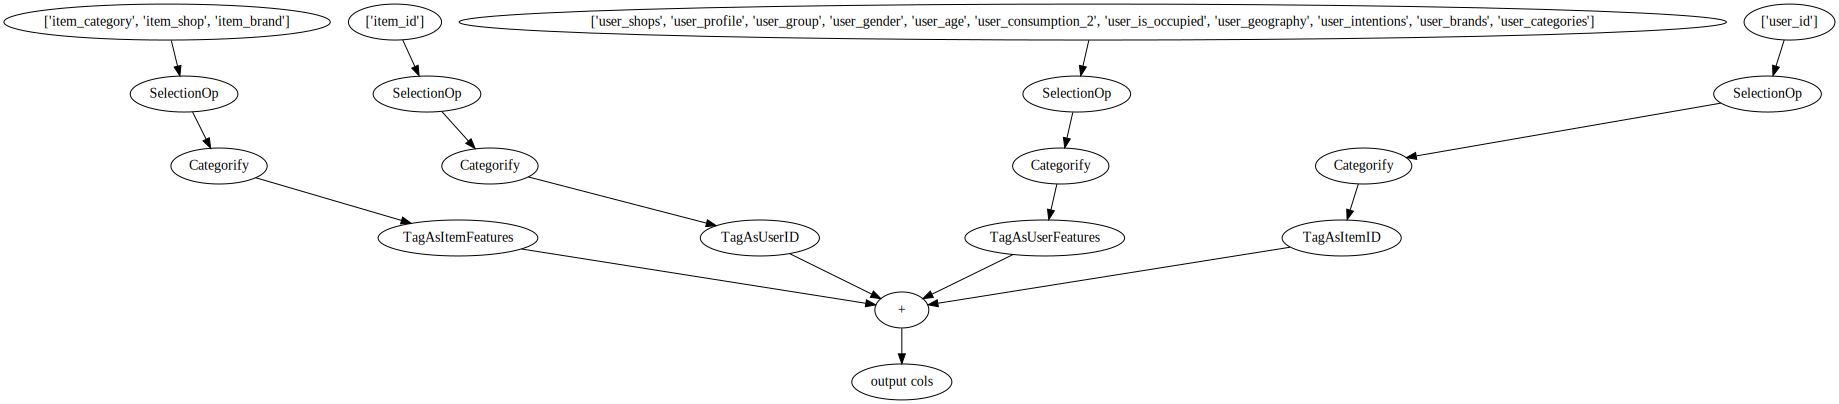

In [79]:
output.graph

With `transform_aliccp` function, we can execute fit() and transform() on the raw dataset applying the operators defined in the NVTabular workflow pipeline above. The processed parquet files are saved to output_path.

In [80]:
train

In [81]:
from merlin.datasets.ecommerce import transform_aliccp
from merlin.models.utils.example_utils import workflow_fit_transform

# workflow = nvt.Workflow(output)
# workflow.fit_transform(train)

# workflow_fit_transform(default_aliccp_transformation(), train, valid, output_path)


transform_aliccp((train, valid), output_path, output)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tag

## Building a Two-Tower Model with Merlin Models

We will use Two-Tower Model for item retrieval task. Real-world large scale recommender systems have hundreds of millions of items (products) and users. Thus, these systems often composed of two stages: candidate generation (retrieval) and ranking (scoring the retrieved items). At candidate generation step, a subset of relevant items from large item corpus is retrieved. You can read more about two stage Recommender Systems here. In this example, we're going to focus on the retrieval stage.

A Two-Tower Model consists of item (candidate) and user (query) encoder towers. With two towers, the model can learn representations (embeddings) for queries and candidates separately.

<img src="https://github.com/kchopra456/ml-model-template/blob/master/images/TwoTower.png?raw=1"  width="30%">

Image Adapted from: [Off-policy Learning in Two-stage Recommender Systems](https://dl.acm.org/doi/abs/10.1145/3366423.3380130)

We use the `schema` object to define our model.

In [82]:
train = Dataset(os.path.join(output_path, "train", "*.parquet"))
valid = Dataset(os.path.join(output_path, "valid", "*.parquet"))

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.1

Select features with user and item tags, and be sure to exclude target column.

In [83]:
schema = train.schema.select_by_tag([Tags.ITEM_ID, Tags.USER_ID, Tags.ITEM, Tags.USER])
train.schema = schema
valid.schema = schema

We can print out the feature column names.

In [84]:
schema

,name,tags,dtype,is_list,is_ragged,properties.max_size,properties.num_buckets,properties.cat_path,properties.freq_threshold,properties.start_index,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.domain.min,properties.domain.max,properties.domain.name
0,user_id,"(Tags.CATEGORICAL, Tags.ITEM_ID, Tags.ID, Tags...","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.user_id.parquet,0.0,0.0,61.0,670.0,0,669,user_id
1,item_id,"(Tags.CATEGORICAL, Tags.USER_ID, Tags.USER, Ta...","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.item_id.parquet,0.0,0.0,61.0,660.0,0,659,item_id
2,item_category,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.item_category.parquet,0.0,0.0,61.0,660.0,0,659,item_category
3,item_shop,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.item_shop.parquet,0.0,0.0,61.0,660.0,0,659,item_shop
4,item_brand,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.item_brand.parquet,0.0,0.0,61.0,660.0,0,659,item_brand
5,user_shops,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.user_shops.parquet,0.0,0.0,61.0,670.0,0,669,user_shops
6,user_profile,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.user_profile.parquet,0.0,0.0,16.0,55.0,0,54,user_profile
7,user_group,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.user_group.parquet,0.0,0.0,16.0,11.0,0,10,user_group
8,user_gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.user_gender.parquet,0.0,0.0,16.0,3.0,0,2,user_gender
9,user_age,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,.//categories/unique.user_age.parquet,0.0,0.0,16.0,7.0,0,6,user_age


We expect the label names to be empty.

In [85]:
label_names = schema.select_by_tag(Tags.TARGET).column_names
label_names

[]

### Negative sampling

Many datasets for recommender systems contain implicit feedback with logs of user interactions like clicks, add-to-cart, purchases, music listening events, rather than explicit ratings that reflects user preferences over items. To be able to learn from implicit feedback, we use the general (and naive) assumption that the interacted items are more relevant for the user than the non-interacted ones.
In Merlin Models we provide some scalable negative sampling algorithms for the Item Retrieval Task. In particular, in this example, we use the `in-batch` sampling algorithm which uses the items interacted by other users as negatives within the same mini-batch.

### Building the Model

Now, let's build our Two-Tower model. In a nutshell, we aggregate all user features to feed in user tower and feed the item features to the item tower. Then we compute the positive score by multiplying the user embedding with the item embedding and sample negative items (read more about negative sampling [here](https://openreview.net/pdf?id=824xC-SgWgU) and [here](https://medium.com/mlearning-ai/overview-negative-sampling-on-recommendation-systems-230a051c6cd7)), whose item embeddings are also multiplied by the user embedding. Then we apply the loss function on top of the positive and negative scores.

In [98]:
import matplotlib.pyplot as plt
import numpy as np

default_plot_metrics = {
    'Loss': 'loss',
    'Recall': 'recall_at_10',
    'NDCG': 'ndcg_at_10',
    # 'AUC': 'auc'
}

def plot_metrics(train_history, val_history, metrics=default_plot_metrics):
    # Create a figure and axis
    fig, ax = plt.subplots(1, len(metrics), figsize=(12, 3))

    for i, (k, m) in enumerate(metrics.items()):
        train_metric = train_history[m]
        val_metric = val_history[m]
        epochs = np.arange(1, len(train_metric) + 1)

        # Plot metric
        ax[i].plot(epochs, train_metric, label=f'Train {k}', marker='o')
        ax[i].plot(epochs, val_metric, label=f'Validation {k}', marker='o')
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel(k)
        ax[i].set_title(f'{k} Over Epochs')
        ax[i].legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [99]:
from collections import defaultdict
def merge_model_history(*history):
    _history = defaultdict(list)
    for _h in history:
        h = _h.history
        for k,v in h.items():
            _history[k].extend(v)
    return _history


We make sure that the mlp blocks used for the user and query towers have the same last dimension. This is needed because we will compute the dot product between the two towers' outputs to get the similarity scores.

In [90]:
import tensorflow as tf

In [88]:
import merlin.models.tf as mm
tower_dim = 64

# create user schema using USER tag
user_schema = schema.select_by_tag(Tags.USER)
# create user (query) tower input block
user_inputs = mm.InputBlockV2(user_schema)
# create user (query) encoder block
query = mm.Encoder(user_inputs, mm.MLPBlock([128, tower_dim], no_activation_last_layer=True))

# create item schema using ITEM tag
item_schema = schema.select_by_tag(Tags.ITEM)
# create item (candidate) tower input block
item_inputs = mm.InputBlockV2(item_schema)
# create item (candidate) encoder block
candidate = mm.Encoder(item_inputs, mm.MLPBlock([128, tower_dim], no_activation_last_layer=True))

`no_activation_last_layer:` when set True, no activation is used for top hidden layer. Learn more [here](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/b9f4e78a8830fe5afcf2f0452862fb3c0d6584ea.pdf).

Build the model class.

In [95]:
model = mm.TwoTowerModelV2(query, candidate)

Note that in the `TwoTowerModelV2` function we did not set `negative_samplers` arg, that means it is set to None. In that case, Two-tower model is trained with contrastive learning and `in-batch` negative sampling strategy.

**Metrics:**

The following information retrieval metrics are used to compute the Top-10 accuracy of recommendation lists containing all items:

- **Normalized Discounted Cumulative Gain (NDCG@10)**: NDCG accounts for rank of the relevant item in the recommendation list and is a more fine-grained metric than HR, which only verifies whether the relevant item is among the top-k items.

- **Recall@10**: Also known as HitRate@n when there is only one relevant item in the recommendation list. Recall just verifies whether the relevant item is among the top-n items.

We need to initialize the dataloaders.

In [96]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                 run_eagerly=False, metrics=[mm.TopKMetricsAggregator.default_metrics(top_ks=[10]), tf.keras.metrics.AUC()],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)


In [97]:
history = model.fit(train, validation_data=valid, batch_size=4096, epochs=3)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed i

Epoch 1/3
86/86 [==============================] - 69s 696ms/step - loss: 0.0957 - recall_at_10: 0.9942 - mrr_at_10: 0.9703 - ndcg_at_10: 0.9762 - map_at_10: 0.9703 - precision_at_10: 0.0994 - auc_1: 0.9554 - regularization_loss: 0.0000e+00 - loss_batch: 0.0939 - val_loss: 0.0035 - val_recall_at_10: 1.0000 - val_mrr_at_10: 0.9995 - val_ndcg_at_10: 0.9997 - val_map_at_10: 0.9995 - val_precision_at_10: 0.1000 - val_auc_1: 0.9609 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 2.4516e-04
Epoch 2/3
86/86 [==============================] - 16s 189ms/step - loss: 0.0033 - recall_at_10: 1.0000 - mrr_at_10: 0.9997 - ndcg_at_10: 0.9997 - map_at_10: 0.9997 - precision_at_10: 0.1000 - auc_1: 0.9615 - regularization_loss: 0.0000e+00 - loss_batch: 0.0032 - val_loss: 0.0029 - val_recall_at_10: 0.9999 - val_mrr_at_10: 0.9996 - val_ndcg_at_10: 0.9997 - val_map_at_10: 0.9996 - val_precision_at_10: 0.1000 - val_auc_1: 0.9617 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 2.9030e-04
Epoc

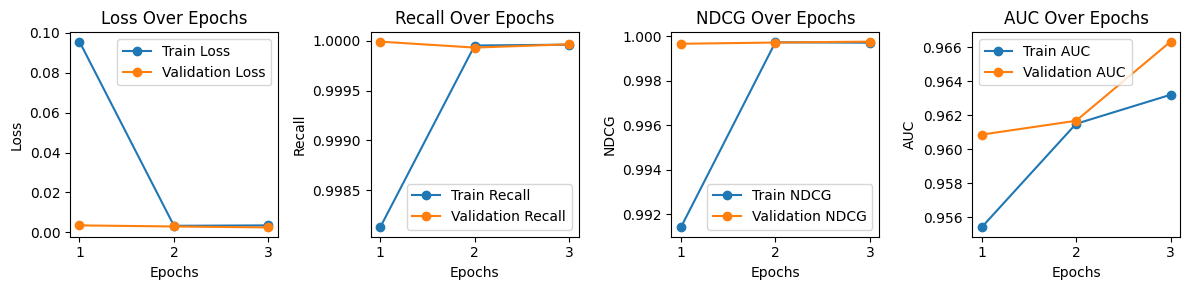

In [100]:
_history = merge_model_history(history)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM})

The validation metric values are calculated given the positive and negative scores in each batch, and then averaged over batches per epoch. That means validation metrics are not computed using the entire item catalog.

### Evaluate the model accuracy

Note that above when we  set `validation_data=valid` in the `model.fit()`, we compute evaluation metrics on validation set using the negative sampling strategy used for training. To determine the exact accuracy of our trained retrieval model, we need to compute the similarity score between a given query and all possible candidates. The higher the score of the positive candidate (the one that is already interacted with, i.e. target item_id returned by dataloader), the more accurate the model is. We can do this using the `topk_model` model that we create below via `to_top_k_encoder` method, and the following section shows how to instantiate it. The `to_top_k_encoder()` is a method of the [RetrievalModelV2](https://github.com/NVIDIA-Merlin/models/blob/stable/merlin/models/tf/models/base.py) class.

`unique_rows_by_features` : A utility function allows extracting both unique user and item features tables as Merlin Dataset object that can easily be converted to a cuDF data frame. The function extracts unique rows from a specified dataset (transformed train set) based on a specified id-column tags (`ITEM` and `ITEM_ID`).

In [102]:
from merlin.models.utils.dataset import unique_rows_by_features


In [103]:
# Top-K evaluation
candidate_features = unique_rows_by_features(train, Tags.ITEM, Tags.ITEM_ID)
candidate_features.head()

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


,user_id,item_category,item_shop,item_brand
0,17,3,3,3
1,29,16,16,16
2,18,84,84,84
3,4,13,13,13
4,1,21,21,21


Below, by using the `topk_model` we can evaluate the trained retrieval model using the entire item catalog. This is applying dot product for entire catalog, and by default it is brute force.

In [104]:
topk = 20
topk_model = model.to_top_k_encoder(candidate_features, k=topk, batch_size=128)

# we can set `metrics` param in the `compile(), if we want
topk_model.compile(run_eagerly=False)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.1

In [105]:
eval_loader = mm.Loader(valid, batch_size=1024).map(mm.ToTarget(schema, "item_id"))

metrics = topk_model.evaluate(eval_loader, return_dict=True)
metrics

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(


ValueError: ignored

### Generate top-K recommendations

We trained a model, now we can generate recommendations offline using `to_top_k_encoder` method. The `to_top_k_encoder()` uses the pre-trained candidate and query encoders to initialize a top-k encoder model, called as `topk_model` in this example. Practically, this method applies the candidate_encoder on the provided candidate_features dataset to set the top-k index of the `topk_model`. Therefore, topk_model object is the one responsible of generating the top-k predictions.

Let's generate top-K (k=20 in our example) recommendations for a given batch of 8 samples. The `to_top_k_encoder()` method uses the candidate (item) features dataset as the identifiers, i.e., we extract the`  candidate_id` arg using `Tags.ITEM_ID` tag by default and set it as `index` when calculating the candidate embeddings. The forward method of `topk_model` takes as the query features as input, and computes the dot product scores between the given query embeddings and all the candidates of the top-k index. Then, it returns the top-k (k=20) item ids with the highest scores. Note that instead of calculating the candidate (item) tower embeddings for each user query, we compute the output of the item tower once and store it in the `TopKEncoder` class  to use for the Top-k index. This is computationally more efficient.

In [ ]:
eval_loader = mm.Loader(valid, batch_size=8, shuffle=False)
batch =next(iter(eval_loader))

Let's check the `user_id` column in a given batch.

In [ ]:
batch[0]['user_id']

<tf.Tensor: shape=(8, 1), dtype=int64, numpy=
array([[ 48],
       [  6],
       [  2],
       [184],
       [ 22],
       [  6],
       [ 30],
       [ 36]])>

The recommended top 20 item ids are returned below. The output of the method is a named tuple `TopKPrediction`, where the first element is the dot product scores and the second element is the encoded item ids (not the original ids).

In [ ]:
topk_model(batch[0])

TopKPrediction(scores=<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0.07914167, 0.06689327, 0.06665718, 0.0558873 , 0.05419895,
        0.05162647, 0.05141887, 0.04779754, 0.04400383, 0.04338987,
        0.04314638, 0.04218695, 0.04206986, 0.03964205, 0.03870573,
        0.03738754, 0.03681045, 0.03679563, 0.03595291, 0.03488279],
       [0.11142829, 0.1087153 , 0.09285022, 0.09184089, 0.09017296,
        0.0819862 , 0.07968194, 0.07311831, 0.07131816, 0.06624649,
        0.0660262 , 0.06577689, 0.06359623, 0.06272355, 0.06217033,
        0.05999621, 0.05986039, 0.05904868, 0.05829312, 0.05809326],
       [0.04108726, 0.03786915, 0.03679999, 0.03606556, 0.0341182 ,
        0.03333249, 0.03283013, 0.03179491, 0.03027055, 0.03001958,
        0.02996242, 0.02868335, 0.02752452, 0.02751509, 0.02742849,
        0.02658201, 0.02591877, 0.02579155, 0.02546304, 0.02458519],
       [0.03614997, 0.03377194, 0.03346077, 0.03037825, 0.02977451,
        0.02895313, 0.02835435, 0.02678858

## Exporting Retrieval Models

So far we have trained and evaluated our Retrieval model. Now, the next step is to deploy our model and generate top-K recommendations given a user (query). We can efficiently serve our model by indexing the trained item embeddings into an **Approximate Nearest Neighbors (ANN)** engine. Basically, for a given user query vector, that is generated passing the user features into user tower of retrieval model, we do an ANN search query to find the ids of nearby item vectors, and at serve time, we score user embeddings over all indexed top-K item embeddings within the ANN engine.

In doing so, we need to export

- user (query) tower
- item and user features
- item embeddings

#### Save and Load User (query) tower

We are able to save the user tower model as a TF model to disk. The user tower model is needed to generate a user embedding vector when a user feature vector <i>x</i> is fed into that model.

In [ ]:
query_tower = model.query_encoder
query_tower.save(os.path.join(DATA_FOLDER, "query_tower"))

## we can load back the saved model via the following script.
#query_tower_loaded = tf.keras.models.load_model(os.path.join(DATA_FOLDER, 'query_tower'))

#### Extract and save User features

With `unique_rows_by_features` utility function we can easily extract both unique user and item features tables as cuDF dataframes. Note that for user features table, we use `USER` and `USER_ID` tags.

In [ ]:
user_features = (
    unique_rows_by_features(train, Tags.USER, Tags.USER_ID).compute().reset_index(drop=True)
)

In [ ]:
user_features.head()

,user_id,user_shops,user_profile,user_group,user_gender,user_age,user_consumption_2,user_is_occupied,user_geography,user_intentions,user_brands,user_categories
0,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,1,1,1,1,1,1,1,2,2,2
2,3,3,1,1,1,1,1,1,1,3,3,3
3,4,4,1,1,1,1,1,1,1,4,4,4
4,5,5,1,1,1,1,1,1,1,5,5,5


In [ ]:
# save to disk
user_features.to_parquet(os.path.join(DATA_FOLDER, "user_features.parquet"))

#### Generate Query embeddings for entire user catalog

In [ ]:
queries = model.query_embeddings(Dataset(user_features, schema=schema.select_by_tag(Tags.USER)),
                                 batch_size=1024, index=Tags.USER_ID)
query_embs_df = queries.compute(scheduler="synchronous").reset_index()

/usr/local/lib/python3.8/dist-packages/merlin/schema/tags.py:148: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(


In [ ]:
query_embs_df.head()

,user_id,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,1,0.041951,-0.020223,0.004236,-0.019033,0.002884,-0.080953,0.060585,0.052524,-0.029782,...,0.099736,-0.028312,0.038981,-0.098385,-0.101973,-0.051495,0.024279,-0.053948,-0.080442,0.004703
1,2,0.053807,-0.033114,-0.038405,-0.050862,0.040319,-0.060739,0.003956,0.012470,-0.063603,...,0.056157,0.034962,-0.003549,-0.070555,-0.023475,-0.058738,0.057749,-0.013966,-0.001620,-0.030841
2,3,-0.009804,0.025582,-0.070978,-0.062639,0.034251,-0.105107,0.072854,0.016531,-0.029134,...,0.107710,-0.068276,0.050339,-0.135261,-0.115445,-0.076873,0.058914,-0.050154,-0.071277,-0.031820
3,4,-0.054897,-0.090031,0.010316,0.045851,-0.019615,0.002119,0.034532,0.125433,-0.134117,...,0.073807,-0.021637,0.013071,-0.145496,-0.091502,0.029946,0.058051,-0.018283,0.038066,-0.105121
4,5,0.066658,0.028629,0.027072,-0.024320,0.035782,-0.049752,0.026108,0.030448,-0.002598,...,0.067228,0.029789,0.096082,-0.076030,-0.118867,-0.053601,0.025621,-0.001777,-0.025906,0.021156


#### Extract and save Item features

In [ ]:
item_features = (
    unique_rows_by_features(train, Tags.ITEM, Tags.ITEM_ID).compute().reset_index(drop=True)
)

In [ ]:
item_features.head()

,item_id,item_category,item_shop,item_brand
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,4,4,4
4,5,5,5,5


In [ ]:
# save to disk
item_features.to_parquet(os.path.join(DATA_FOLDER, "item_features.parquet"))

#### Extract and save Item embeddings

In [ ]:
item_embs = model.candidate_embeddings(Dataset(item_features, schema=schema.select_by_tag(Tags.ITEM)),
                                       batch_size=1024, index=Tags.ITEM_ID)

/usr/local/lib/python3.8/dist-packages/merlin/schema/tags.py:148: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(


In [ ]:
item_embs_df = item_embs.compute(scheduler="synchronous")

In [ ]:
item_embs_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
item_id,,,,,,,,,,,,,,,,,,,,,
1,-0.021552,0.009041,0.039659,-0.115629,0.060703,-0.025404,0.001678,-0.022630,-0.043372,-0.043020,...,0.055401,-0.020197,0.091445,-0.031282,-0.038851,0.003069,0.018751,0.007528,-0.035626,-0.057195
2,-0.083753,-0.116476,0.073937,-0.021895,-0.037875,0.079780,0.004227,-0.062871,0.067589,-0.113532,...,0.016558,-0.062858,0.007280,-0.145148,-0.073590,0.060061,0.042919,-0.088881,0.045371,-0.048104
3,-0.022572,-0.143781,0.095565,-0.072755,-0.024208,0.016993,-0.063992,-0.016109,-0.046727,-0.076944,...,-0.016716,-0.120303,-0.027779,-0.030434,0.003762,0.044557,0.028406,-0.097061,0.047091,-0.070876
4,-0.034698,0.046747,0.050764,-0.054780,0.049690,-0.054132,0.044862,-0.051085,0.025827,-0.008969,...,0.034949,-0.009016,-0.010063,-0.007224,0.004805,-0.033879,0.026008,0.066739,-0.081608,0.002007
5,0.017667,-0.093071,0.119211,-0.039053,-0.044223,-0.002900,-0.011234,0.021149,0.006894,-0.073159,...,0.041408,-0.068992,0.081714,0.003833,-0.015269,-0.011885,0.041777,-0.039943,0.100604,-0.012898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,-0.008736,-0.025814,0.021996,-0.067662,0.038304,-0.039822,-0.014580,-0.014729,-0.051024,-0.017028,...,0.036276,-0.017140,0.026932,-0.039948,-0.042317,0.036567,0.014907,-0.069974,0.014789,-0.000786
658,0.027235,-0.055484,0.100215,-0.022288,-0.015791,-0.013113,-0.011211,-0.060337,-0.005251,-0.066255,...,-0.007403,0.035502,0.051252,0.036262,-0.033077,0.054807,-0.015973,-0.037896,0.036095,-0.012522
659,0.000050,-0.083014,-0.003769,-0.016448,0.058482,0.003810,0.002106,-0.021589,-0.029082,-0.005173,...,-0.014442,-0.045111,0.025007,0.011599,-0.026002,0.031850,0.043968,-0.053928,0.040387,0.037862


In [ ]:
# save to disk
item_embs_df.to_parquet(os.path.join(DATA_FOLDER, "item_embeddings.parquet"))

That's it. You have learned how to train and evaluate your Two-Tower retrieval model, and then how to export the required components to be able to deploy this model to generate recommendations. In order to learn more on serving a model to [Triton Inference Server](https://github.com/triton-inference-server/server), please explore the examples in the [Merlin](https://github.com/NVIDIA-Merlin/Merlin) and [Merlin Systems](https://github.com/NVIDIA-Merlin/systems) repos.